# Zomato data analysis project

### step 1- Importing libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Create dataframe

In [9]:
dataframe = pd.read_csv("zomato.csv")

In [10]:
dataframe.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### Convert datatype column- rate

In [12]:
def handlerate(value):
    value = str(value).split("/")
    value = value[0];
    return float(value)

dataframe["rate"]=dataframe["rate"].apply(handlerate)
print(dataframe.head(5))

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


### Cleaning dataframe


In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### Q.1. What type of restaurant do the majority of customers order from ?

In [16]:
dataframe.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


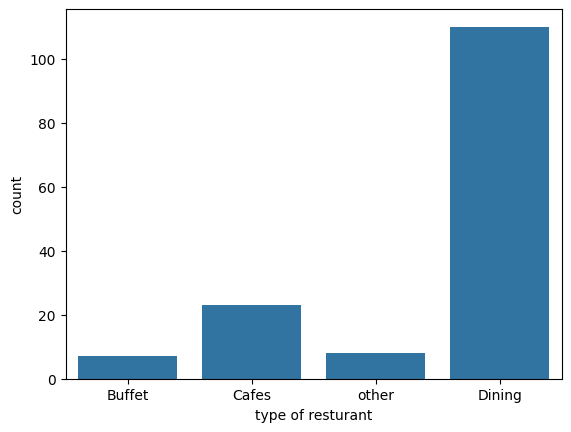

In [18]:
sns.countplot(x=dataframe["listed_in(type)"])
plt.xlabel("type of resturant")
plt.show()

#### Conclusion-Majority of the resturant falls in dinning category

### Q.2 How many votes has each type of restaurant received from customers ?

In [20]:
dataframe.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


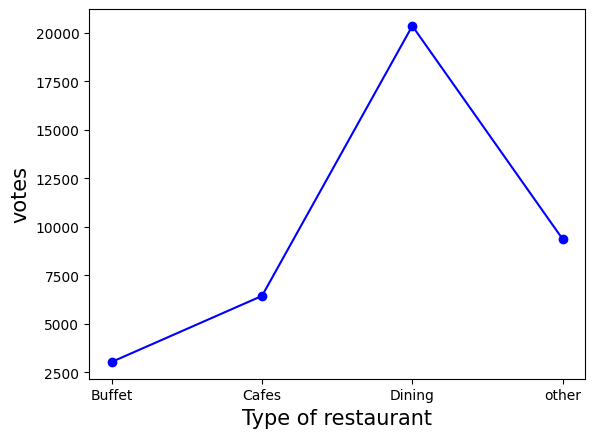

In [33]:
grouped_data = dataframe.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes" : grouped_data})
plt.plot(result, c="blue", marker="o")
plt.xlabel("Type of restaurant", c="black", size=15)
plt.ylabel("votes", c="black", size=15)
plt.show()

#### Conclusion - dining restaurant has recieved maximum votes

### Q.3 What are the ratings that majority of restaurants have recieved ?

In [37]:
dataframe.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


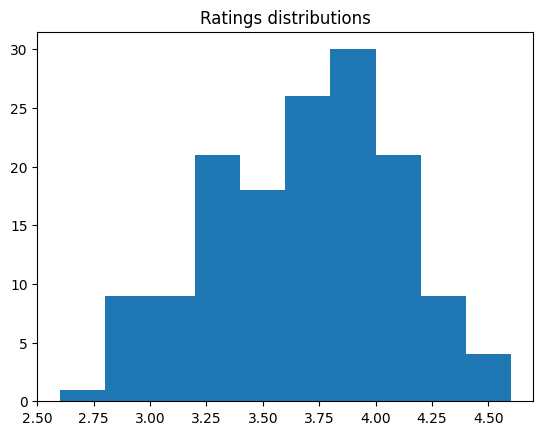

In [38]:
plt.hist(dataframe["rate"],bins=10)
plt.title("Ratings distributions")
plt.show()

#### Conclusion -The majority restaurant received ratings from 3.5 to 4

### Q.4 Zomato has observed that most couples order modt of their food online,what is their average spending on each order ?

In [42]:
dataframe.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


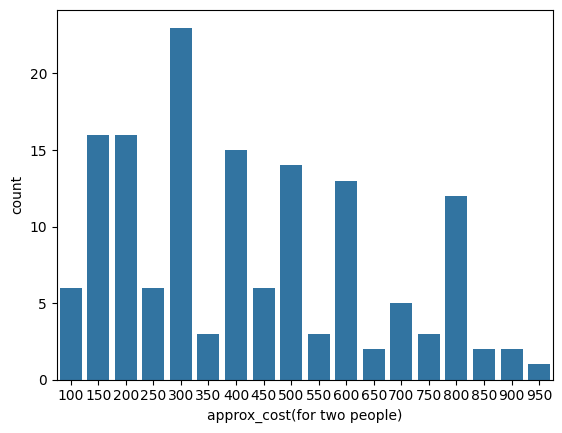

In [43]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.show()

#### Conclusion- The majority of couple prefered restaurant with an approximate cost of 300 RS

### Q.5 Which mode(online/offline) has received the maximum ratings ?

In [44]:
dataframe.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


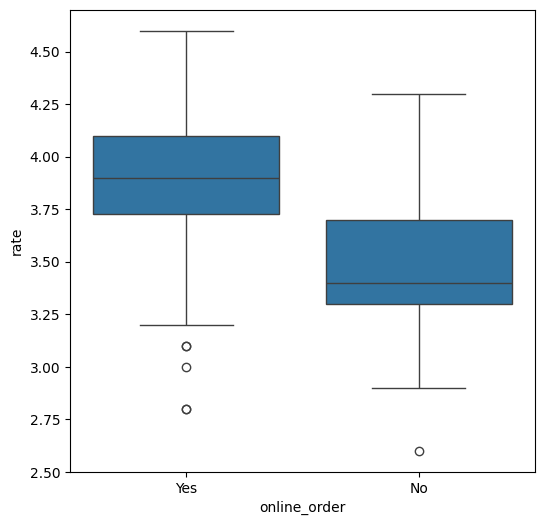

In [46]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order", y="rate", data=dataframe)
plt.show()


#### Conclusion- Offine order received lower rating in comparision online

### Q.6 Which type of restaurant received more offline orders, so that zomato can preffred customers with some good offers ?

In [49]:
dataframe.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


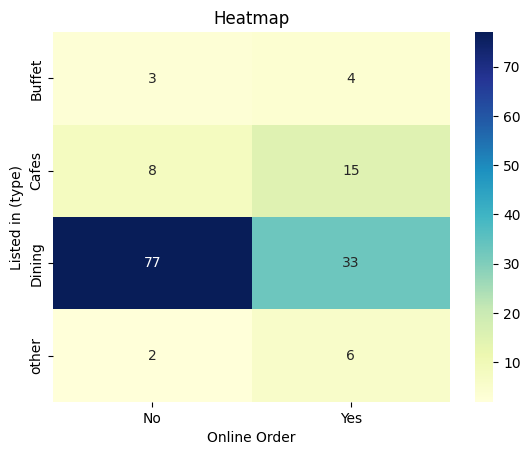

In [50]:
pivot_table = dataframe.pivot_table(index="listed_in(type)", columns="online_order", aggfunc="size", fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in (type)")
plt.show()


#### Conclusion- Dining restaurant primarily accept offline orders whereas cafe primarily receive online orders.This suggest that client preffered order in person at restaurants,but prefer online ordering at cafes.